In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#WARMUPEXERCISE Example function in python
# A = warmUpExercise() is an example function that returns the nxn identity matrix
def warmUpExercise(n):
    A = np.identity(n)
    return A

In [2]:
warmUpExercise(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [25]:
def plotData(x, y):
    #PLOTDATA Plots the data points x and y into a new figure 
    #   PLOTDATA(x,y) plots the data points and gives the figure axes labels of
    #   population and profit.

    # ====================== YOUR CODE HERE ======================
    # Instructions: Plot the training data into a figure using the 
    #               "figure" and "plot" commands. Set the axes labels using
    #               the "xlabel" and "ylabel" commands. Assume the 
    #               population and revenue data have been passed in
    #               as the x and y arguments of this function.

    plt.scatter(x,y)
    plt.xlabel('Population in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show()


In [34]:
#- Function to compute the cost of linear regression
def computeCost(X, y, theta):
    #COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = X.shape[0] # number of training examples

    # You need to return the following variables correctly 

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    predictions= X @ theta         # @ is for matrix multiplication in python
    sqrErrors = np.square(predictions-y)
    J =1/(2*m) * np.sum(sqrErrors)

    # =========================================================================

    return J


In [35]:
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENT Performs gradient descent to learn theta
    #theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #taking num_iters gradient steps with learning rate alpha

   #Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(0,num_iters):

        ''' # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.'''

        error = (X @ theta ) - y
    
        theta = theta - alpha * 1/m * (X.transpose() @ error)


    #============================================================
    # Save the cost J in every iteration
    
        J_history[iter] = computeCost(X, y, theta)

    return theta, J_history

Running warmUpExercise ... 

5x5 Identity Matrix: 



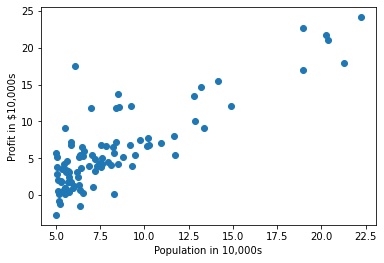


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = %f
 32.072733877455676
Expected cost value (approx) 32.07

True

With theta = [-1 ; 2]
Cost computed = %f
 54.24245508201238
Expected cost value (approx) 54.24


Running Gradient Descent ...

Theta found by gradient descent:

%f
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




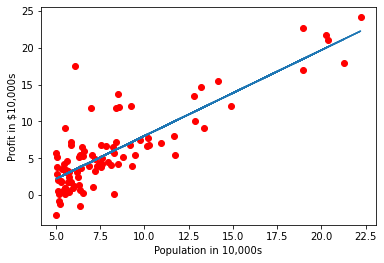

For population = 35,000, we predict a profit of %f
,..... [4519.7678677]
For population = 70,000, we predict a profit of %f
..... [45342.45012945]


In [53]:
# Complete warmUpExercise.m
print('Running warmUpExercise ... \n')
print('5x5 Identity Matrix: \n')
warmUpExercise(5)


# ======================= Part 2: Plotting =======================

file_as_array = np.loadtxt("ex1data1.txt",comments = "#", delimiter = ",",unpack = False)
#file_as_array.shape

x = file_as_array[:,:-1]
y = file_as_array[:, 1:]
plotData(x, y)

#=================== Part 3: Cost and Gradient descent ===================
m = len(y)
X = np.hstack((np.ones((m,1)), x)) # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize fitting parameters
#print(X)
# Some gradient descent settings
iterations = 1500
alpha = 0.01

print('\nTesting the cost function ...\n')
#compute and display initial cost
J1 = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = %f\n', J1)
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
p = np.array([[-1 ],[2]])
print(theta.shape==p.shape)
J2 = computeCost(X, y, p)
print('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J2)
print('Expected cost value (approx) 54.24\n')

print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta,J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n');
print('%f\n', theta)
print('Expected theta values (approx)\n')
print(' -3.6303\n  1.1664\n\n')

# Plot the linear fit
#hold on; % keep previous plot visible
plt.plot(X[:,1:2], X@theta, '-')
plt.scatter(x,y,color='r')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()
#hold off % don't overlay any more plots on this figure

# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] @ theta
print('For population = 35,000, we predict a profit of %f\n,.....',predict1*10000)
predict2 = [1, 7] @ theta
print('For population = 70,000, we predict a profit of %f\n.....', predict2*10000)


#% ============= Part 4: Visualizing J(theta_0, theta_1) =============
#print('Visualizing J(theta_0, theta_1) ...\n')

#Grid over which we will calculate J
#theta0_vals = np.linspace(-10, 10, 100)
#theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
#J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
#for i in range(0,len(theta0_vals)):
   # for j in range(0,len(theta1_vals)):
  #      t = [theta0_vals[i], theta1_vals[j]]
 #       J_vals[i,j] = computeCost(X, y, t)
#

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
# Surface plot
#fig=plt.figure()
#ax = plt.axes(projection = '3d')

#ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis',edgecolor='none')
#plt.xlabel('theta_0')
#plt.ylabel('theta_1')
#plt.show()
# Contour plot
#plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
#contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
#xlabel('\theta_0'); ylabel('\theta_1');
#hold on;
#plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);